In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
def displaymd(mdstr):
    display(Markdown(mdstr))


In [2]:
geo_data = pd.read_csv('../data/geocodings.csv',index_col=0)
geo_data.shape

(254, 4)

In [3]:
data_2020 = pd.read_csv('../data/Mobi_System_Data_2020.csv',compression='zip',index_col=0)
data_2020.shape

(572166, 14)

In [4]:
merge_2020 = data_2020.merge(geo_data.rename({'lat':'dep_lat','long':'dep_long','postal_code':'dep_postal_code'},axis=1),left_on='Departure station',right_on='address').drop('address',axis=1)
merge_2020 = merge_2020.merge(geo_data.rename({'lat':'return_lat','long':'return_long','postal_code':'return_postal_code'},axis=1),left_on='Return station',right_on='address').drop('address',axis=1)
merge_2020.shape

(571648, 20)

In [6]:
# drop Na
merge_2020 = merge_2020.dropna()
merge_2020.shape

(571572, 20)

In [7]:
merge_2020.nunique()

Departure                          8435
Return                             8440
Bike                               2053
Departure station                   221
Return station                      221
Membership type                      22
Covered distance (m)              10040
Duration (sec.)                   13178
Departure battery voltage (mV)      772
Return battery voltage (mV)         797
Departure temperature (C)            57
Return temperature (C)               57
Stopover duration (sec.)           3631
Number of stopovers                  14
dep_postal_code                     191
dep_lat                             209
dep_long                            209
return_postal_code                  191
return_lat                          209
return_long                         209
dtype: int64

## Bikes Rental each month

In [10]:
merge_2020['month'] = merge_2020['Departure'].apply(lambda x : x.split('-')[1])

In [18]:
merge_2020['month'].value_counts().sort_index()

01    25056
02    40943
03    36451
04    30708
05    48696
06    58214
07    80015
08    87870
09    65366
10    47847
11    28367
12    22039
Name: month, dtype: int64

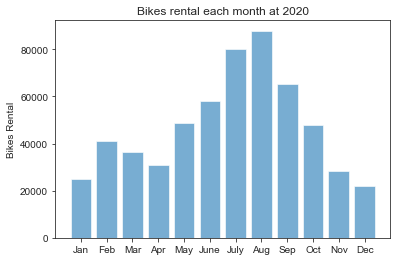

In [44]:
sns.set_style('ticks')
objects = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June','July','Aug','Sep','Oct','Nov','Dec')
x = np.arange(len(objects))
y = merge_2020['month'].value_counts().sort_index().values

plt.bar(x, y, align='center', alpha=0.6)
plt.xticks(x, objects)
plt.ylabel('Bikes Rental')
plt.title('Bikes rental each month at 2020')

plt.show()

## Hot routes and stations

In [70]:
merge_2020['route'] = merge_2020['Departure station'] + ' To ' + merge_2020['Return station']

In [78]:
route = merge_2020['route'].value_counts()[:10].reset_index()

In [79]:
route

,index,route
0,0209 Stanley Park - Information Booth To 0209 ...,2534
1,0209 Stanley Park - Information Booth To 0105 ...,1890
2,0105 Stanley Park - Totem Poles To 0102 Stanle...,1637
3,0035 Coal Harbour Community Centre To 0035 Coa...,1504
4,0028 Davie & Beach To 0028 Davie & Beach,1436
5,0105 Stanley Park - Totem Poles To 0105 Stanle...,1359
6,0105 Stanley Park - Totem Poles To 0103 Stanle...,1279
7,0154 Kitsilano Beach Park To 0154 Kitsilano Be...,1248
8,0102 Stanley Park - Second Beach North To 0102...,1082
9,0209 Stanley Park - Information Booth To 0102 ...,1026


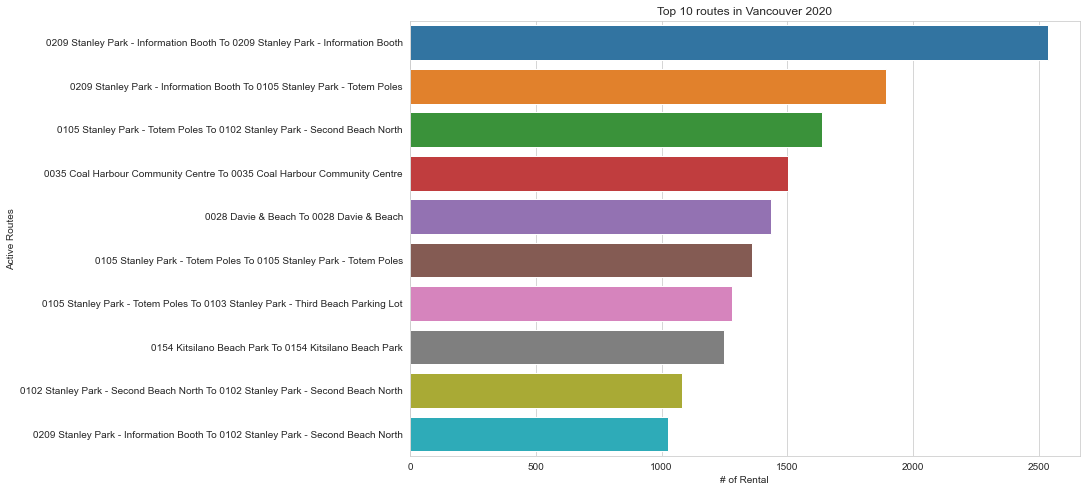

In [82]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
ax = sns.barplot(x = 'route', y='index', data=route, order=route['index'])
ax.set(xlabel='# of Rental', ylabel='Active Routes', title='Top 10 routes in Vancouver 2020')
plt.show()

In [111]:
merge_2020['Return station'].apply(lambda x : x.split('-')[0])

0         0196 Drake & Hornby
1         0196 Drake & Hornby
2         0196 Drake & Hornby
3         0196 Drake & Hornby
4         0196 Drake & Hornby
                 ...         
571643      0986 Quebec Yard 
571644      0986 Quebec Yard 
571645      0986 Quebec Yard 
571646      0986 Quebec Yard 
571647             0985 Yard 
Name: Return station, Length: 571572, dtype: object

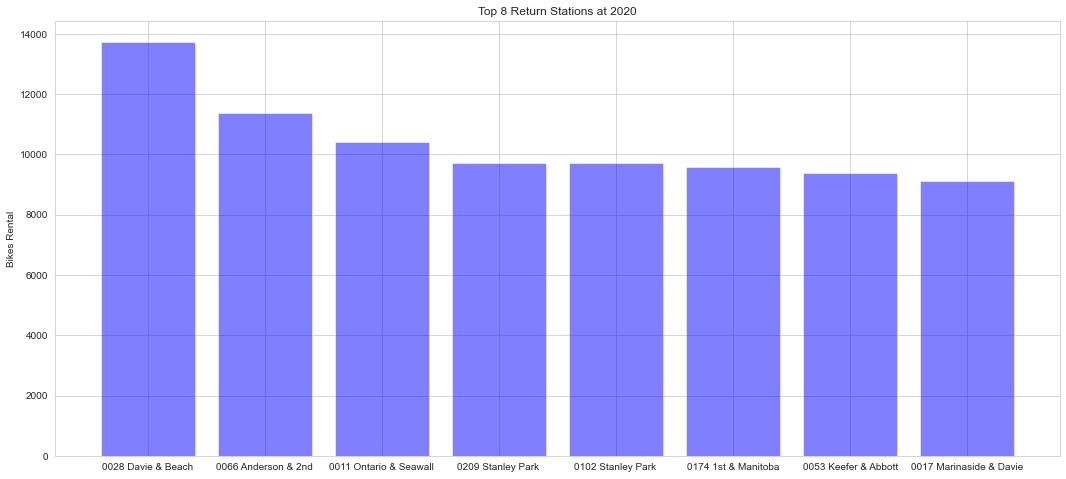

In [128]:

index = merge_2020['Return station'].apply(lambda x : x.split('-')[0]).value_counts()[:8].index
x = np.arange(8)
y = merge_2020['Return station'].apply(lambda x : x.split('-')[0]).value_counts()[:8].values

plt.figure(figsize=(18, 8))
plt.bar(x, y, alpha=0.5, color='b')
plt.xticks(x, index)
plt.ylabel('Bikes Rental')
plt.title('Top 8 Return Stations at 2020')

plt.show()

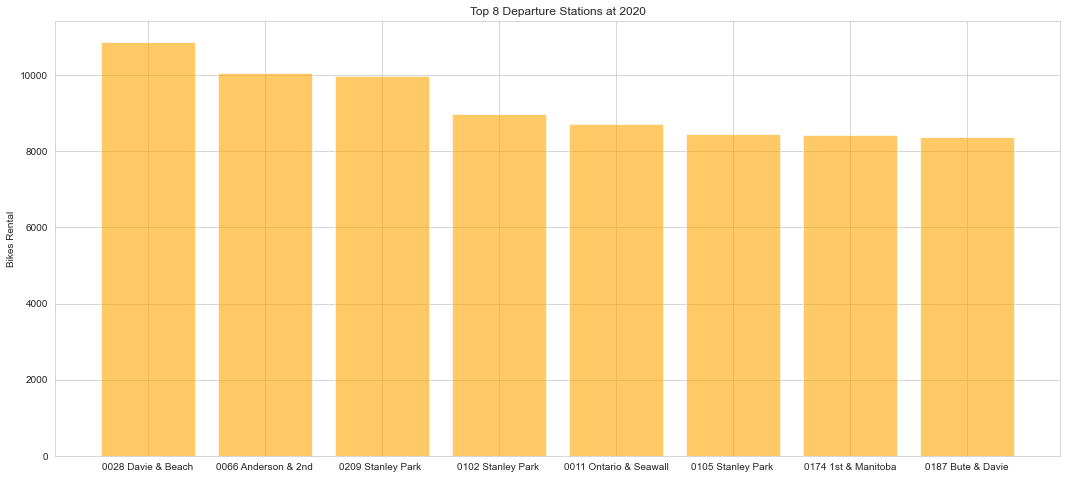

In [131]:

index = merge_2020['Departure station'].apply(lambda x : x.split('-')[0]).value_counts()[:8].index
x = np.arange(8)
y = merge_2020['Departure station'].apply(lambda x : x.split('-')[0]).value_counts()[:8].values

plt.figure(figsize=(18, 8))
plt.bar(x, y, alpha=0.6, color='orange')
plt.xticks(x, index)
plt.ylabel('Bikes Rental')
plt.title('Top 8 Departure Stations at 2020')

plt.show()